<h1>COSIpy with continuum response</h1>

In [1]:
from COSIpy import *
import response
from fit import fit
plt.style.use('thomas')

Welcome to JupyROOT 6.22/02


/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
plt.style.use('thomas')

<h3>Data set (simulation): flat spectrum between 200 and 3000 keV at ~zenith without background:<br><br>
$S(E) = 1.18 \times 10^{-5} E^0\,\mathrm{ph\,s^{-1}\,cm^{-2}\,keV^{-1}}$</h3>

In [615]:
data_dir = '/Users/thomassiegert/data/COSI/Simulations/Crab/'
filename1 = 'Crab_F10C_Z00.inc1.id1_CE0000-5000keV.tra.gz'
filename2 = 'Crab_F10C_Z18.inc1.id1_CE0000-5000keV.tra.gz'
filename3 = 'Crab_F10C_Z36.inc1.id1_CE0000-5000keV.tra.gz'
filename4 = 'Crab_F10C_Z54.inc1.id1_CE0000-5000keV.tra.gz'

<h3>COSIpy work flow:</h3>

In [616]:
# create analysis object
analysis1 = COSIpy(data_dir,filename1)
analysis2 = COSIpy(data_dir,filename2)
analysis3 = COSIpy(data_dir,filename3)
analysis4 = COSIpy(data_dir,filename4)

In [617]:
# read in data (tra file)
analysis1.read_COSI_DataSet()
analysis2.read_COSI_DataSet()
analysis3.read_COSI_DataSet()
analysis4.read_COSI_DataSet()

In [618]:
# define everything in one time bin
Delta_T = 86400
analysis1.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis2.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis3.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis4.dataset.time_binning_tags(time_bin_size=Delta_T)

In [619]:
# definition of energy bins (exactly as response right now)
energy_bin_edges=np.array([150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

In [620]:
energy_bin_edges

array([ 150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

In [621]:
# define energy and pixel binning
pixel_size = 6.
analysis1.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis2.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis3.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis4.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)

In [622]:
# bin data
analysis1.dataset.get_binned_data()
analysis2.dataset.get_binned_data()
analysis3.dataset.get_binned_data()
analysis4.dataset.get_binned_data()

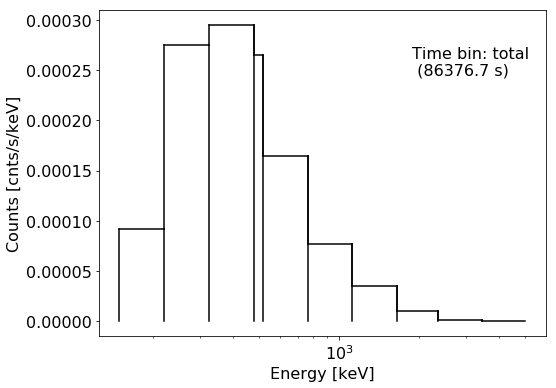

In [623]:
analysis3.dataset.plot_raw_spectrum()
plt.xscale('log')

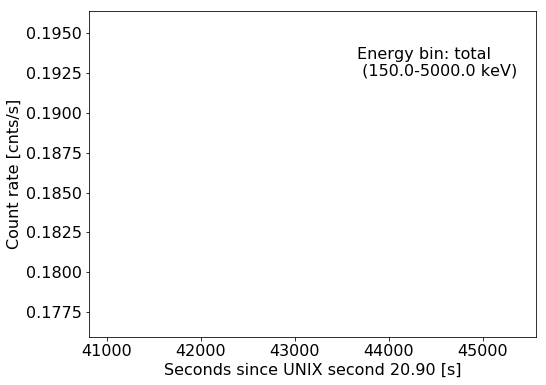

In [624]:
# light curve
analysis3.dataset.plot_lightcurve()

In [625]:
# definition of poitings (balloon stability + Earth rotation)
pointing1 = Pointing(dataset=analysis1.dataset,)
pointing2 = Pointing(dataset=analysis2.dataset,)
pointing3 = Pointing(dataset=analysis3.dataset,)
pointing4 = Pointing(dataset=analysis4.dataset,)

Text(0, 0.5, 'Zenith [deg]')

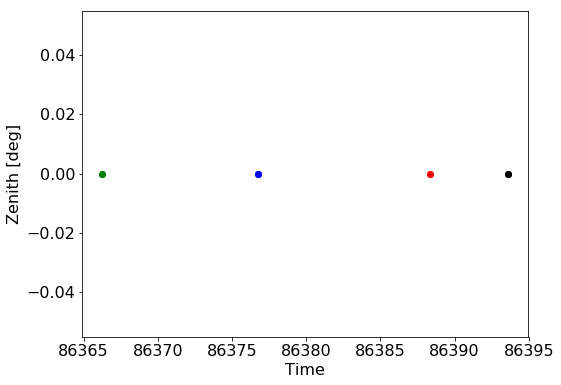

In [626]:
plt.plot(pointing1.cdtpoins,pointing1.zpoins[:,1],'o-')
plt.plot(pointing2.cdtpoins,pointing2.zpoins[:,1],'o-')
plt.plot(pointing3.cdtpoins,pointing3.zpoins[:,1],'o-')
plt.plot(pointing4.cdtpoins,pointing4.zpoins[:,1],'o-')
plt.xlabel('Time')
plt.ylabel('Zenith [deg]')

In [627]:
# background
background1 = BG(dataset=analysis1.dataset,mode='sim 6deg despina')
background2 = BG(dataset=analysis2.dataset,mode='sim 6deg despina')
background3 = BG(dataset=analysis3.dataset,mode='sim 6deg despina')
background4 = BG(dataset=analysis4.dataset,mode='sim 6deg despina')

Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...


In [628]:
# source position definition
l1,b1 = 180,0
l2,b2 = 180,18
l3,b3 = 180,-36
l4,b4 = 180,54

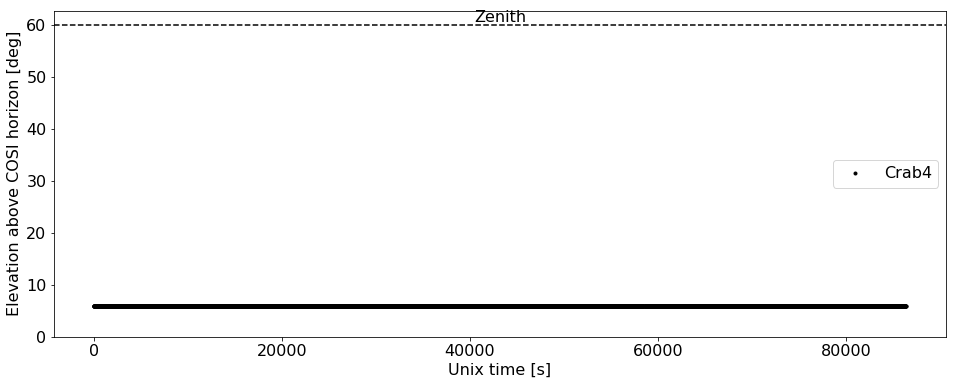

In [629]:
# plot elevation
analysis4.plot_elevation([l4],[b4],['Crab4'])

In [24]:
%load_ext autoreload

In [25]:
%aimport response
%aimport fit
%aimport COSIpy_tools
%aimport COSIpy

In [26]:
%autoreload 1

In [27]:
%aimport

Modules to reload:
COSIpy COSIpy_tools fit response

Modules to skip:



In [28]:
from fit import *

In [29]:
from COSIpy import *

<h3>Reading in response (quite large, though)</h3>

In [30]:
rsp = response.SkyResponse(filename='response/RegularResponseGrid_Continuum_10bins_v1.npz',pixel_size=6)

Reading complete continuum response. This might take a while...
Done.

Creating general RMF matrices, stay tuned...



Done.

Creating general IRF. Wait for it...
Done.

Deleting full matrix.
Done. Now have fun.


In [630]:
rsp.rsp.response_grid_normed_efinal.shape

(30, 60, 30, 1145, 10)

<h3>Calculate response for a point source at the known position</h3>

In [744]:
rsp.calculate_PS_response(analysis1.dataset,
                          pointing1,l1,b1,1,
                          background=background1,
                          pixel_size=pixel_size)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


<h3>Fit to data to extract counts per unit time and energy:</h3>

In [745]:
result1 = fit(analysis1.dataset,
              pointing1,
              rsp,
              background1,
              #priors=np.array([[1e-6,1e8],[1e-6,1e4]]), # sky unconstrained, BG ~ 0
              verbose=True)

result1.MAP_solution(scipy=False)

Start optimising energy bin 1/10...

Energy range: 150-220 keV ...
Start optimising energy bin 2/10...

Energy range: 220-325 keV ...
Start optimising energy bin 3/10...

Energy range: 325-480 keV ...
Start optimising energy bin 4/10...

Energy range: 480-520 keV ...
Start optimising energy bin 5/10...

Energy range: 520-765 keV ...
Start optimising energy bin 6/10...

Energy range: 765-1120 keV ...
Start optimising energy bin 7/10...

Energy range: 1120-1650 keV ...
Start optimising energy bin 8/10...

Energy range: 1650-2350 keV ...
Start optimising energy bin 9/10...

Energy range: 2350-3450 keV ...
Start optimising energy bin 10/10...

Energy range: 3450-5000 keV ...
Initial log joint probability = -204.195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      14      -202.528   0.000572687   0.000721544           1           1       21   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tole

<h3>Reading in "sky-only" simulation to compare extraction:</h3>

In [633]:
sky_filename1 = filename1
sky_data1 = COSIpy(data_dir,sky_filename1)
sky_data1.read_COSI_DataSet()
sky_data1.dataset.time_binning_tags(time_bin_size=Delta_T) # everything in one time bin
sky_data1.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=6.)
sky_data1.dataset.get_binned_data()
# pure sky count rate
sim_sky_rate1 = np.sum(sky_data1.dataset.binned_data,axis=(0,2,3))/\
                (sky_data1.dataset.energies.energy_bin_wid*2*sky_data1.dataset.times.total_time)

In [634]:
sky_filename2 = filename2
sky_data2 = COSIpy(data_dir,sky_filename2)
sky_data2.read_COSI_DataSet()
sky_data2.dataset.time_binning_tags(time_bin_size=Delta_T) # everything in one time bin
sky_data2.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=6.)
sky_data2.dataset.get_binned_data()
# pure sky count rate
sim_sky_rate2 = np.sum(sky_data2.dataset.binned_data,axis=(0,2,3))/\
                (sky_data2.dataset.energies.energy_bin_wid*2*sky_data2.dataset.times.total_time)

In [635]:
sky_filename3 = filename3
sky_data3 = COSIpy(data_dir,sky_filename3)
sky_data3.read_COSI_DataSet()
sky_data3.dataset.time_binning_tags(time_bin_size=Delta_T) # everything in one time bin
sky_data3.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=6.)
sky_data3.dataset.get_binned_data()
# pure sky count rate
sim_sky_rate3 = np.sum(sky_data3.dataset.binned_data,axis=(0,2,3))/\
                (sky_data3.dataset.energies.energy_bin_wid*2*sky_data3.dataset.times.total_time)

In [636]:
sky_filename4 = filename4
sky_data4 = COSIpy(data_dir,sky_filename4)
sky_data4.read_COSI_DataSet()
sky_data4.dataset.time_binning_tags(time_bin_size=Delta_T) # everything in one time bin
sky_data4.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=6.)
sky_data4.dataset.get_binned_data()
# pure sky count rate
sim_sky_rate4 = np.sum(sky_data4.dataset.binned_data,axis=(0,2,3))/\
                (sky_data4.dataset.energies.energy_bin_wid*2*sky_data4.dataset.times.total_time)

In [637]:
n_e = analysis1.dataset.energies.n_energy_bins

In [638]:
from COSIpy_tools import step_plot

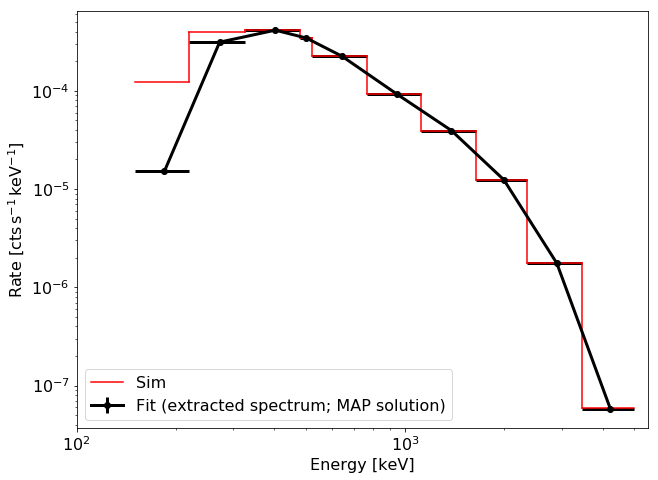

In [687]:
# fit
result1.plot_MAP_spectrum()
# simulation
step_plot(rsp.e_edges,sim_sky_rate1,color='red',plot_label='Sim') 
plt.legend()

<h3>Perfect fit (by definition).<br><br>
    Now estimating error bars:</h3>

In [746]:
result1.fit(iters=1000)

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 111.72    4.86  52.05  20.43  75.09 107.37 145.62 220.13    114   1.01
Abg[1]    0.85  7.5e-3   0.08   0.69    0.8   0.86    0.9    1.0    112    1.0

Samples were drawn using NUTS at Thu Jan 14 15:55:47 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-32

###################################################################

Gradient evaluation took 8.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.84 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.647808 seconds (Warm-up)
               0.538532 seconds (Sampling)
               1.18634 seconds (Total)


Gradient evaluation took 0.000129 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.29 seconds.
Adjust your expectations accordingly!


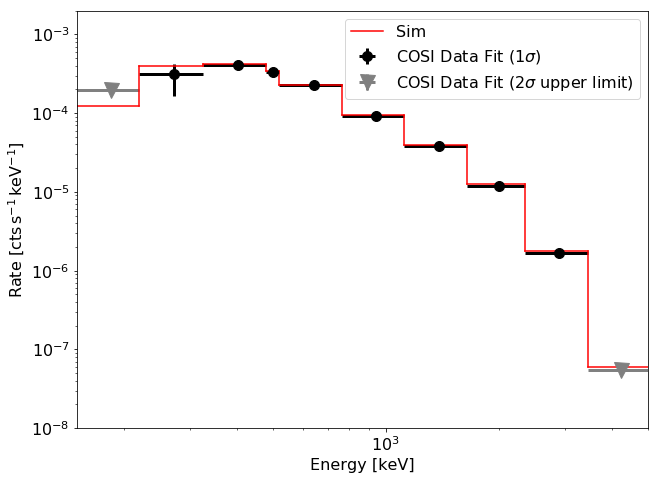

In [749]:
# fit
result1.plot_extracted_spectrum(ul=2,with_systematics=True)
# simulation
step_plot(rsp.e_edges,sim_sky_rate1,color='red',plot_label='Sim') 

plt.xlim(150,5000)
plt.ylim(1e-8,2e-3)
plt.legend()

In [721]:
systematics1 = (sim_sky_rate1-result1.diff_rate)/np.mean(np.abs(result1.diff_rate_err),axis=1)

In [722]:
systematics1

array([10.86650327,  3.48319983,  1.08728947,  0.6330228 ,  0.67493718,
        0.61639429,  0.96445703,  0.73285618,  0.54534077,  0.43486805])

In [352]:
analysis1.dataset.bin_for_angles()
analysis2.dataset.bin_for_angles()
analysis3.dataset.bin_for_angles()
analysis4.dataset.bin_for_angles()

In [387]:
rsp.calculate_PS_response(analysis1.dataset,
                          pointing1,l1,b1,1,
                          background=background1,
                          pixel_size=pixel_size,reduced=False,lookup=False)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...
Your computer will explode.
Calculating averaged RMF for object at (l,b) = (180.0,0.0)


In [388]:
sky1_phi_binned, sky1_psi_binned, sky1_chi_binned =\
analysis1.dataset.bin_for_angles(binned_array=rsp.sky_response)

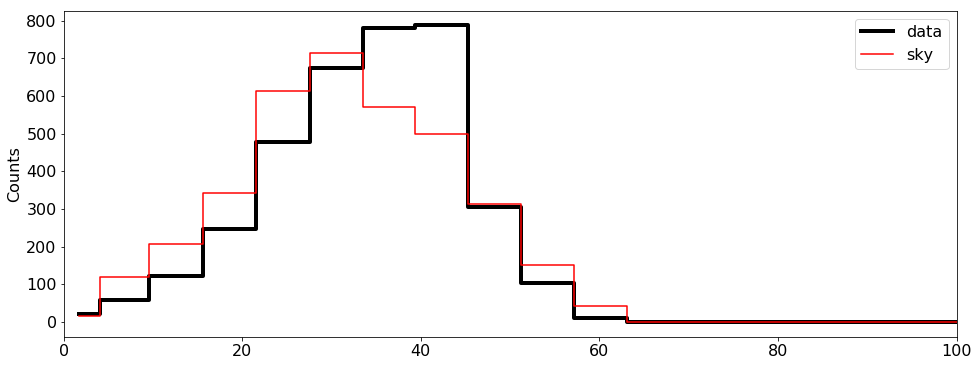

In [389]:
ec = 1

plt.figure(figsize=(16,6))

plt.step(uniq_bb/deg2rad,analysis1.dataset.psi_binned[0,ec,:],where='mid',label='data',linewidth=4)

plt.step(uniq_bb/deg2rad,sky1_psi_binned[0,ec,:]*(sim_sky_rate1*rsp.e_wid*Delta_T)[ec],where='mid',label='sky')


#plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

In [391]:
rsp.calculate_PS_response(analysis2.dataset,
                          pointing2,l2,b2,1,
                          background=background2,
                          pixel_size=pixel_size,reduced=False,lookup=False)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...
Your computer will explode.
Calculating averaged RMF for object at (l,b) = (180.0,18.0)


In [392]:
sky2_phi_binned, sky2_psi_binned, sky2_chi_binned =\
analysis2.dataset.bin_for_angles(binned_array=rsp.sky_response)

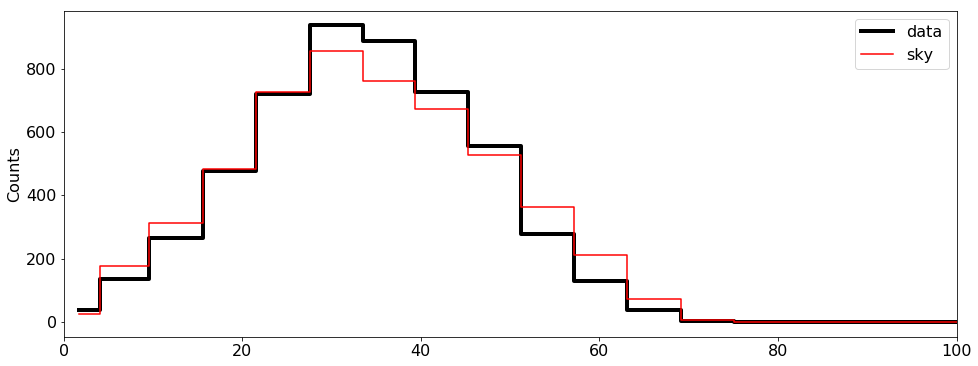

In [393]:
ec = 2

plt.figure(figsize=(16,6))

plt.step(uniq_bb/deg2rad,analysis2.dataset.psi_binned[0,ec,:],where='mid',label='data',linewidth=4)

plt.step(uniq_bb/deg2rad,sky2_psi_binned[0,ec,:]*(sim_sky_rate2*rsp.e_wid*Delta_T)[ec],where='mid',label='sky')


#plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

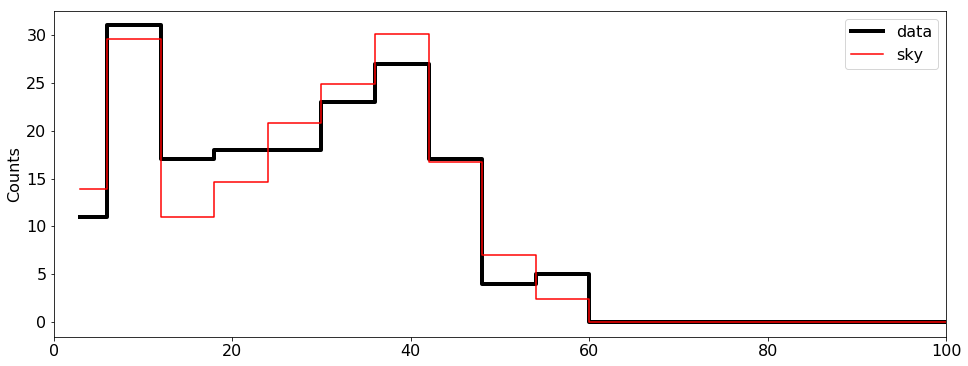

In [394]:
ec = 8

plt.figure(figsize=(16,6))

plt.step(pp/deg2rad,analysis2.dataset.phi_binned[0,ec,:],where='mid',label='data',linewidth=4)

plt.step(pp/deg2rad,sky2_phi_binned[0,ec,:]*(sim_sky_rate2*rsp.e_wid*Delta_T)[ec],where='mid',label='sky')


#plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

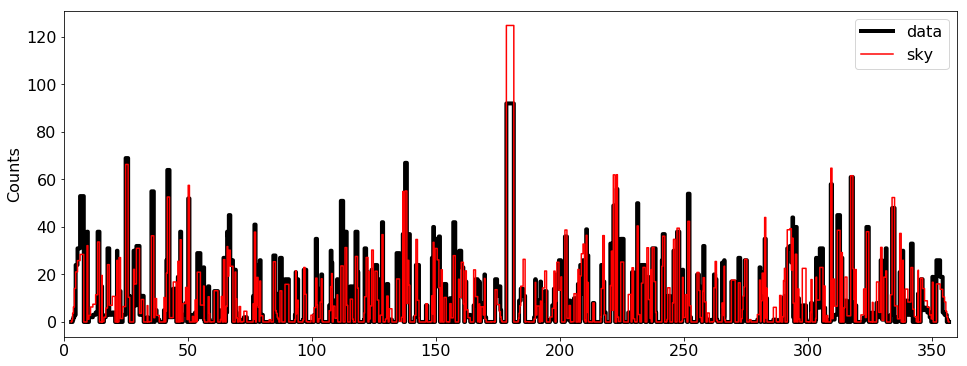

In [395]:
ec = 2

plt.figure(figsize=(16,6))

plt.step(uniq_ll/deg2rad,analysis2.dataset.chi_binned[0,ec,:],where='mid',label='data',linewidth=4)

plt.step(uniq_ll/deg2rad,sky2_chi_binned[0,ec,:]*(sim_sky_rate2*rsp.e_wid*Delta_T)[ec],where='mid',label='sky')


#plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,360)
plt.legend()

In [735]:
rsp.calculate_PS_response(analysis2.dataset,
                          pointing2,l2,b2,1,
                          background=background2,
                          pixel_size=pixel_size,)

result2 = fit(analysis2.dataset,
              pointing2,
              rsp,
              background2,
              #priors=np.array([[1e-6,1e8],[1e-6,1e8]]),
              verbose=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,18.0)


In [736]:
result2.fit(iters=1000)

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 236.02    6.59   66.8 115.47 192.59 233.49 274.31 374.71    103    1.0
Abg[1]    0.71  8.2e-3   0.09   0.53   0.65   0.71   0.76   0.88    110    1.0

Samples were drawn using NUTS at Thu Jan 14 15:50:52 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-32

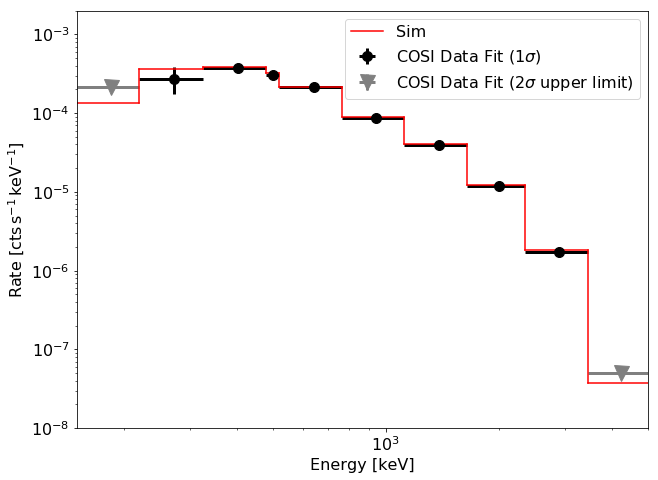

In [741]:
# fit
result2.plot_extracted_spectrum(ul=2,with_systematics=True)
# simulation
step_plot(rsp.e_edges,sim_sky_rate2,color='red',plot_label='Sim') 

plt.xlim(150,5000)
plt.ylim(1e-8,2e-3)
plt.legend()

In [723]:
systematics2 = (sim_sky_rate2-result2.diff_rate)/np.mean(np.abs(result2.diff_rate_err),axis=1)

In [778]:
rsp.calculate_PS_response(analysis3.dataset,
                          pointing3,l3,b3,1,
                          background=background3,
                          pixel_size=pixel_size,)

result3 = fit(analysis3.dataset,
              pointing3,
              rsp,
              background3,
              #priors=np.array([[1e-6,1e8],[1e-6,1e8]]),
              verbose=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-36.0)


In [779]:
result3.fit(iters=1000)

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  85.22    4.98  45.75   7.89  50.89  82.86 111.84 200.59     84   1.01
Abg[1]    0.85  8.8e-3   0.09   0.64    0.8   0.84   0.91   1.01    105    1.0

Samples were drawn using NUTS at Thu Jan 14 16:07:33 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-32

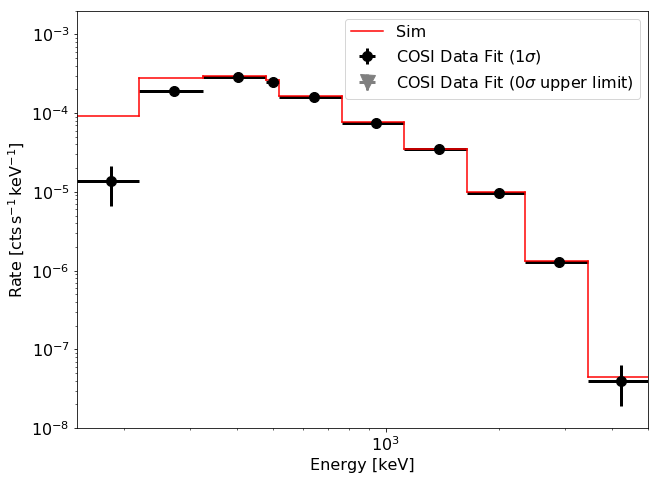

In [781]:
# fit
result3.plot_extracted_spectrum(ul=0)
# simulation
step_plot(rsp.e_edges,sim_sky_rate3,color='red',plot_label='Sim') 

plt.xlim(150,5000)
plt.ylim(1e-8,2e-3)
plt.legend()

In [724]:
systematics3 = (sim_sky_rate3-result3.diff_rate)/np.mean(np.abs(result3.diff_rate_err),axis=1)

In [705]:
rsp.calculate_PS_response(analysis4.dataset,
                          pointing4,l4,b4,1,
                          background=background4,
                          pixel_size=pixel_size)

result4 = fit(analysis4.dataset,
              pointing4,
              rsp,
              background4,
              #priors=np.array([[1e-6,1e8],[1e-6,1e-8]]),
              verbose=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,54.0)


In [706]:
result4.fit(iters=5000)

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=2500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  24.96    0.84  18.87   0.84  10.18   20.9  35.14  70.56    503    1.0
Abg[1]    0.88  5.2e-3   0.12   0.62   0.81   0.89   0.96   1.09    520    1.0

Samples were drawn using NUTS at Thu Jan 14 15:24:04 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220

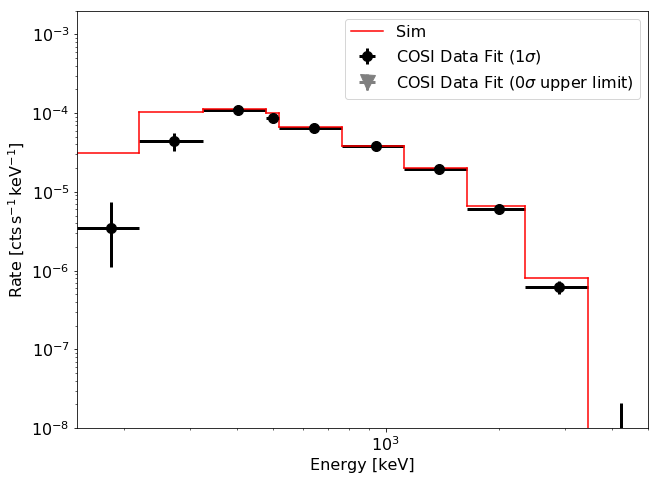

In [707]:
# fit
result4.plot_extracted_spectrum(ul=0)
# simulation
step_plot(rsp.e_edges,sim_sky_rate4,color='red',plot_label='Sim') 

plt.xlim(150,5000)
plt.ylim(1e-8,2e-3)
plt.legend()

In [725]:
systematics4 = (sim_sky_rate4-result4.diff_rate)/np.mean(np.abs(result4.diff_rate_err),axis=1)

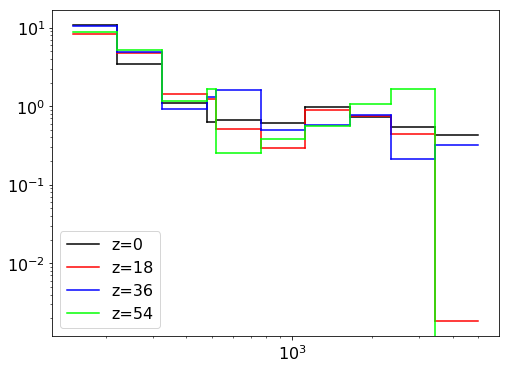

In [728]:
step_plot(rsp.e_edges,(systematics1),color='black',plot_label='z=0')
step_plot(rsp.e_edges,(systematics2),color='red',plot_label='z=18')
step_plot(rsp.e_edges,(systematics3),color='blue',plot_label='z=36')
step_plot(rsp.e_edges,(systematics4),color='lime',plot_label='z=54')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [732]:
systematics_all = np.array([systematics1,systematics2,systematics3,systematics4])

In [733]:
systematics_all.shape

(4, 10)

In [734]:
np.mean(systematics_all,axis=0)

array([9.61348192, 4.5787978 , 1.15368693, 1.22003529, 0.75795775,
       0.44679336, 0.7485999 , 0.82748034, 0.7139853 , 0.16266929])

In [664]:
rsp.calculate_PS_response(analysis1.dataset,
                          pointing1,l1,b1,1,
                          background=background1,
                          pixel_size=pixel_size)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


<h3>How to fit this count rate spectrum to get spectral parameter in physical (model) space: (cf. presentation)</h3>

In [665]:
from spectral_shapes import *

<h3>$\mathrm{ph\,s^{-1}\,cm^{-2}\,keV^{-1}} \Rightarrow \mathrm{ph\,s^{-1}\,cm^{-2}}$:</h3>

In [666]:
crab_params = np.array([3.90e-6,-2.23,100,5000])

In [667]:
# dN
plaw_true_fluxes = integrate_powerlaw(rsp.e_min, rsp.e_max, crab_params[0:2])
plaw_boxcar_true_fluxes = integrate_powerlaw_boxcar(rsp.e_min, rsp.e_max, crab_params)

In [668]:
plaw_true_fluxes

array([0.01229947, 0.0077922 , 0.00481966, 0.00073326, 0.00268231,
       0.00165187, 0.00104686, 0.00060458, 0.00041776, 0.00025357])

In [669]:
plaw_boxcar_true_fluxes

array([0.01229947, 0.0077922 , 0.00481966, 0.00073326, 0.00268231,
       0.00165187, 0.00104686, 0.00060458, 0.00041776, 0.00025357])

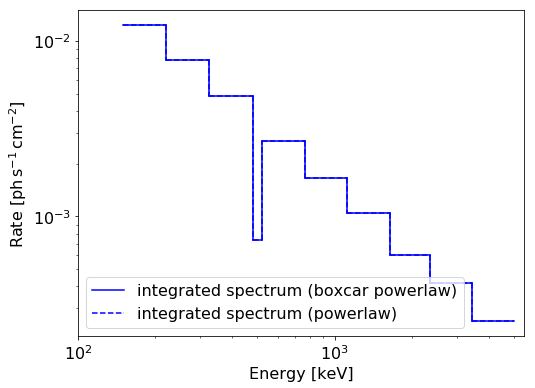

In [670]:
# integrated flux boxcar 
step_plot(rsp.e_edges,plaw_boxcar_true_fluxes,plot_label='integrated spectrum (boxcar powerlaw)',color='blue')

# integrated flux boxcar 
step_plot(rsp.e_edges,plaw_true_fluxes,plot_label='integrated spectrum (powerlaw)',color='blue',linestyle='--')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Rate [$\mathrm{ph\,s^{-1}\,cm^{-2}}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.legend()

<h3>The step $\mathrm{ph\,s^{-1}\,cm^{-2}} \Rightarrow \mathrm{ph\,s^{-1}}$ requires the effective area tand the energy redistribution matrix.<br>
The matrix has to be averaged over the course of the data set:</h3>

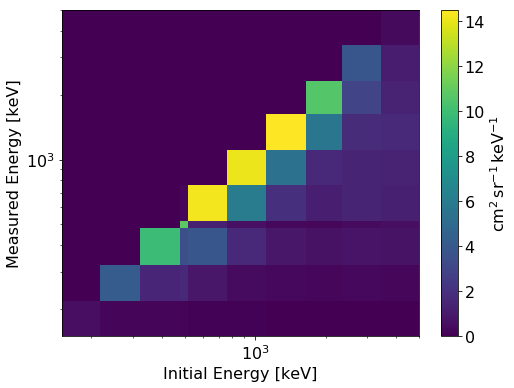

In [671]:
result1.plot_rmf()

In [672]:
rsp.rsp.ZA_energy_response.shape

(30, 60, 10, 10)

<h3>$\mathrm{ph\,s^{-1}\,cm^{-2}} \Rightarrow \mathrm{ph\,s^{-1}}$:<br><br>
$\int\,dE_{f}\,\mathrm{RMF}(E_f,E_i)S(E_i,\vec{\alpha}) \Longrightarrow$ Dot product.</h3>

In [673]:
plaw_boxcar_folded_counts = np.dot(rsp.rmf,plaw_boxcar_true_fluxes[0:])
plaw_folded_counts = np.dot(rsp.rmf,plaw_true_fluxes[0:])

In [674]:
# normalisation to energy (units of time included in the spectral model ??)
plaw_boxcar_folded_count_rate = plaw_boxcar_folded_counts/(rsp.e_wid[0:])
plaw_folded_count_rate = plaw_folded_counts/(rsp.e_wid[0:])

In [675]:
result1.diff_rate[0:],np.abs(result1.diff_rate_err[0:,:].T)

(array([1.54641980e-05, 3.11263117e-04, 4.12594130e-04, 3.35922408e-04,
        2.23624420e-04, 9.26566996e-05, 3.80703677e-05, 1.20487528e-05,
        1.66839953e-06, 4.87529121e-08]),
 array([[7.74603132e-06, 2.52120494e-05, 7.40981303e-06, 1.16318104e-05,
         3.12292598e-06, 1.89143900e-06, 1.13919503e-06, 7.19145758e-07,
         1.58870921e-07, 2.08443089e-08],
        [1.09063373e-05, 2.06474482e-05, 6.25475334e-06, 1.21002470e-05,
         3.85252642e-06, 1.93069494e-06, 1.29270025e-06, 5.44065100e-07,
         1.54193247e-07, 2.54804091e-08]]))

<Figure size 737.28x552.96 with 0 Axes>

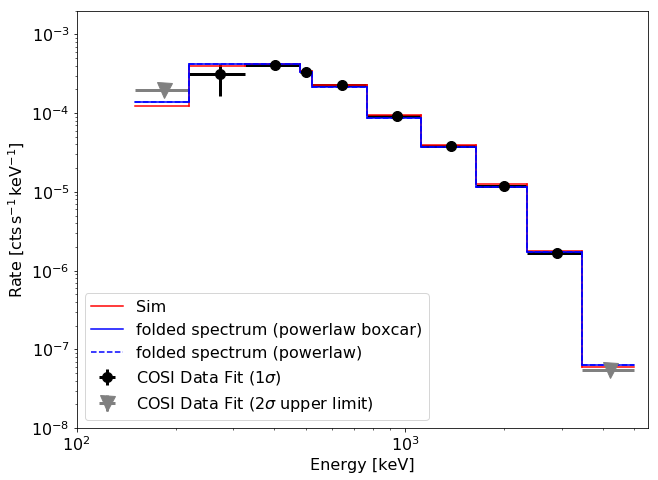

In [773]:
plt.figure(figsize=(10.24,7.68))

# data fit
result1.plot_extracted_spectrum(with_systematics=True,ul=2)

# simulation megalib
step_plot(rsp.e_edges,sim_sky_rate1,color='red',plot_label='Sim') 

ff = 1#1.1e-1
# folded spectrum boxcar powerlaw
step_plot(rsp.e_edges,plaw_boxcar_folded_count_rate*ff,color='blue',plot_label='folded spectrum (powerlaw boxcar)') 

# folded spectrum powerlaw
step_plot(rsp.e_edges,plaw_folded_count_rate*ff,color='blue',plot_label='folded spectrum (powerlaw)',linestyle='--') 

plt.xlabel('Energy [keV]')
plt.ylabel(r'Rate [$\mathrm{cts\,s^{-1}\,keV^{-1}}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.ylim(1e-8,2e-3)

plt.legend()

In [677]:
plaw_boxcar_folded_count_rate[0:]/(result1.diff_rate)

array([8.88431729, 1.36386519, 1.0178563 , 0.99427067, 0.94655074,
       0.9398377 , 0.98185548, 0.94981205, 1.02863657, 1.28197675])

In [751]:
prior_crab = {0: ('truncated_normal_prior',1e-9,1e8,0,np.inf,r'$C_0$'),
              1: ('normal_prior',-2.0,5.0,r'$\alpha$')}
function = 'powerlaw'

In [752]:
result1.fit_spectrum(function,prior_crab,e_select=np.arange(10),with_systematics=True)

  4%|▍         | 76/2000 [00:00<00:02, 750.80it/s]

Fitting spectrum ... with some info included here ...


100%|██████████| 2000/2000 [00:02<00:00, 768.70it/s]


Processing took 2.6 seconds


Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
    $C_0$:  4.05e-06  5.00e-08  3.90e-06  4.00e-06  4.05e-06  4.10e-06  4.19e-06
 $\alpha$: -2.19e+00  2.38e-02 -2.26e+00 -2.22e+00 -2.19e+00 -2.17e+00 -2.12e+00


Chi2 (dof): 10.3 (8)


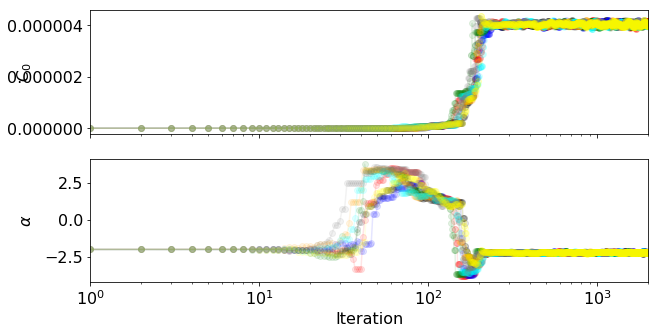

In [753]:
result1.plot_parameter_chains()

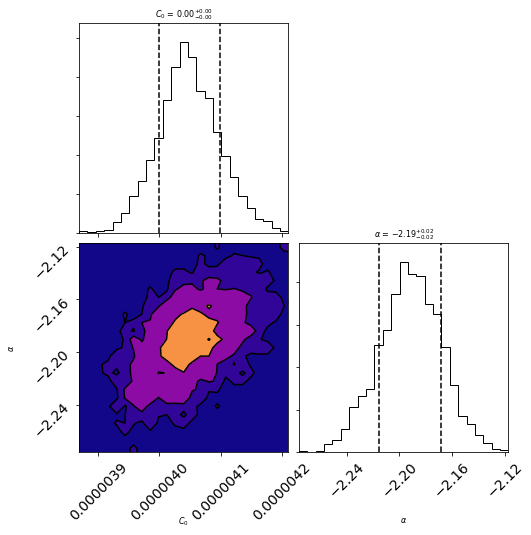

In [754]:
result1.corner_plot()

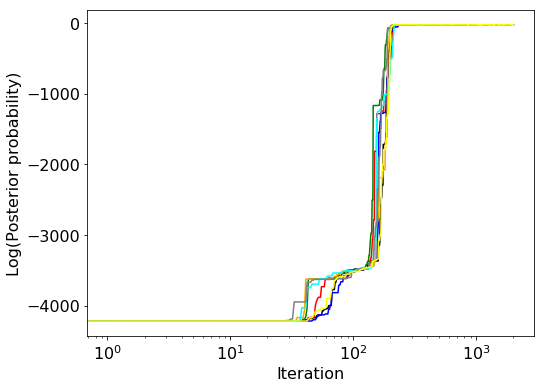

In [755]:
result1.plot_posterior_chains()

In [756]:
result1.calculate_model_posteriors()

14000 16000


In [762]:
np.nanmax(np.abs(result1.diff_rate_err[result1.e_select,:].T),axis=0)*result1.systematics

array([9.85623172e-05, 1.46508822e-04, 8.70245141e-06, 1.55880476e-05,
       4.45508438e-06, 2.05581487e-06, 1.41001937e-06, 7.05503801e-07,
       1.53849057e-07, 2.73297833e-08])

In [761]:
result1.systematics

array([9.61348192, 4.5787978 , 1.15368693, 1.22003529, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [771]:
result1.diff_rate[result1.e_select],(np.nanmax(np.abs(result1.diff_rate_err[result1.e_select,:].T),axis=0)*result1.systematics)

(array([1.77536031e-05, 3.10642496e-04, 4.11415161e-04, 3.35800599e-04,
        2.24277084e-04, 9.25334939e-05, 3.82087044e-05, 1.19641952e-05,
        1.67157583e-06, 4.88616160e-08]),
 array([9.85623172e-05, 1.46508822e-04, 8.70245141e-06, 1.55880476e-05,
        4.45508438e-06, 2.05581487e-06, 1.41001937e-06, 7.05503801e-07,
        1.53849057e-07, 2.73297833e-08]))

In [770]:
result1.systematics.shape

(10,)

(1e-08, 0.0006954237279807065)

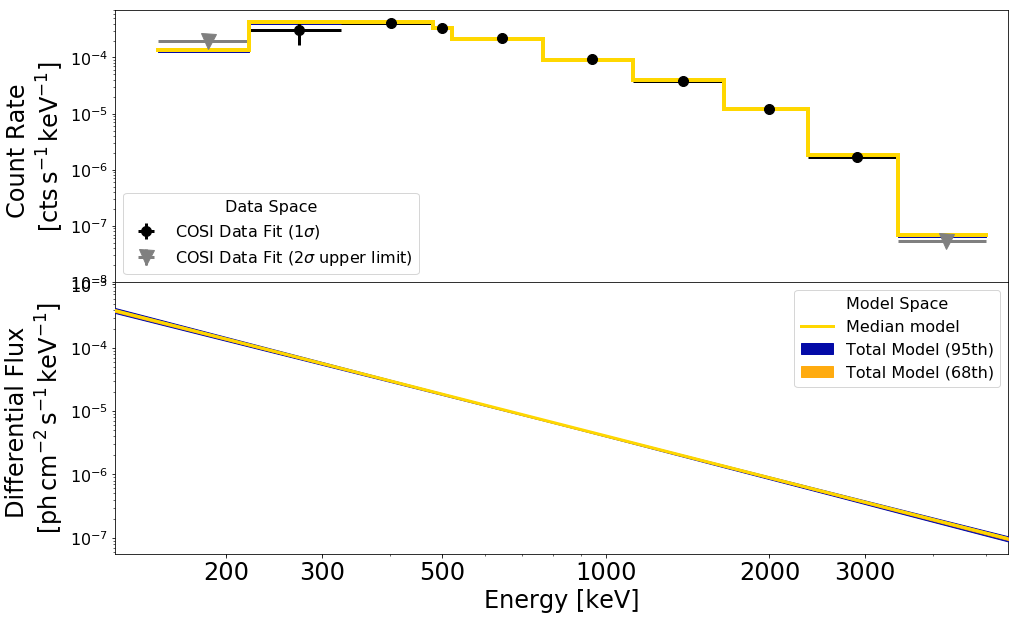

In [776]:
pc = result1.plot_posterior_spectrum(model_mode='flux',with_systematics=True,ul=2)
pc[0].set_ylim(1e-8,)

#pc[0].set_xscale('linear')
#pc[1].set_yscale('linear')

<Figure size 737.28x552.96 with 0 Axes>

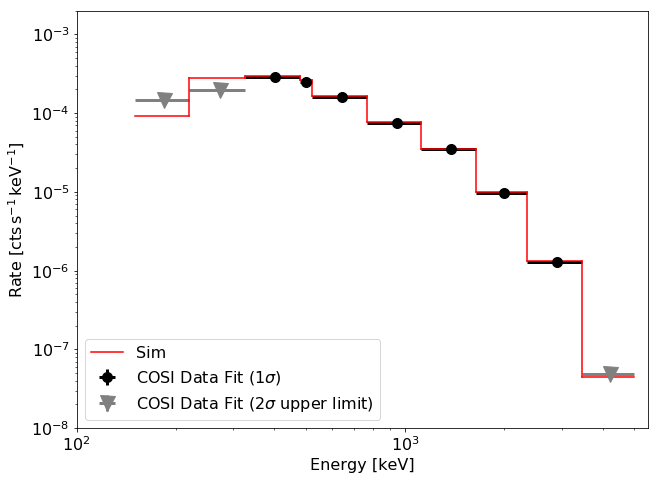

In [784]:
plt.figure(figsize=(10.24,7.68))

# data fit
result3.plot_extracted_spectrum(with_systematics=True,ul=2)

# simulation megalib
step_plot(rsp.e_edges,sim_sky_rate3,color='red',plot_label='Sim') 

plt.xlabel('Energy [keV]')
plt.ylabel(r'Rate [$\mathrm{cts\,s^{-1}\,keV^{-1}}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.ylim(1e-8,2e-3)

plt.legend()

In [785]:
result3.fit_spectrum(function,prior_crab,e_select=np.arange(10),with_systematics=True)

  4%|▍         | 77/2000 [00:00<00:02, 769.91it/s]

Fitting spectrum ... with some info included here ...


100%|██████████| 2000/2000 [00:02<00:00, 754.95it/s]


Processing took 2.7 seconds


Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
    $C_0$:  4.19e-06  5.50e-08  4.04e-06  4.13e-06  4.19e-06  4.24e-06  4.35e-06
 $\alpha$: -2.27e+00  2.36e-02 -2.34e+00 -2.29e+00 -2.27e+00 -2.24e+00 -2.20e+00


Chi2 (dof): 8.1 (8)


In [786]:
result3.calculate_model_posteriors()

14000 16000


(1e-08, 0.0004916623377394625)

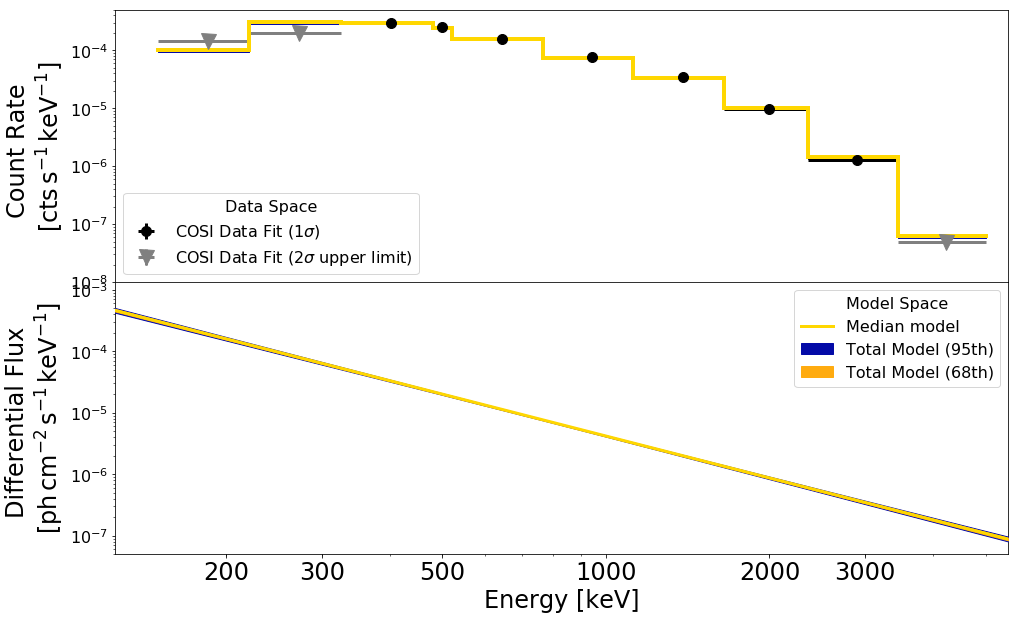

In [787]:
pc = result3.plot_posterior_spectrum(model_mode='flux',with_systematics=True,ul=2)
pc[0].set_ylim(1e-8,)

#pc[0].set_xscale('linear')
#pc[1].set_yscale('linear')

In [788]:
l_gridg = np.linspace(180-75,180+75,14)
b_gridg = np.linspace(0-75,0+75,14)

l_grid = l_gridg[0:-1]+np.diff(l_gridg[0:-1])[0]/2
b_grid = b_gridg[0:-1]+np.diff(b_gridg[0:-1])[0]/2

l_grid[l_grid<-180] += 360

L_GRIDg, B_GRIDg = np.meshgrid(l_gridg,b_gridg)
L_GRID, B_GRID = np.meshgrid(l_grid,b_grid)

In [242]:
result1.TS_map([L_GRID,B_GRID],scipy=False)

Fitting background only...


Now fitting object at (l,b) = (110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-69.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -69.23076923076923
Now fitting object at (l,b) = (122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-69.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -69.23076923076923
Now fitting object at (l,b) = (133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-69.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -69.23076923076923
Now fitting object at (l,b) = (145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-69.2)


Something went wrong with the fit, ignoring grid point  145.3846153846154 -69.23076923076923
Now fitting object at (l,b) = (156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-69.2)


Something went wrong with the fit, ignoring grid point  156.92307692307693 -69.23076923076923
Now fitting object at (l,b) = (168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-69.2)


Something went wrong with the fit, ignoring grid point  168.46153846153845 -69.23076923076923
Now fitting object at (l,b) = (180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-69.2)


Something went wrong with the fit, ignoring grid point  180.0 -69.23076923076923
Now fitting object at (l,b) = (191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-69.2)


Something went wrong with the fit, ignoring grid point  191.53846153846155 -69.23076923076923
Now fitting object at (l,b) = (203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-69.2)


Something went wrong with the fit, ignoring grid point  203.0769230769231 -69.23076923076923
Now fitting object at (l,b) = (214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-69.2)


Something went wrong with the fit, ignoring grid point  214.6153846153846 -69.23076923076923
Now fitting object at (l,b) = (226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-69.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -69.23076923076923
Now fitting object at (l,b) = (237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-69.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -69.23076923076923
Now fitting object at (l,b) = (249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-69.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -69.23076923076923
Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -57.69230769230769
Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -57.69230769230769
Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -57.69230769230769
Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 -57.69230769230769
Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 -57.69230769230769
Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 -57.69230769230769
Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 -57.69230769230769
Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -57.69230769230769
Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -57.69230769230769
Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -57.69230769230769
Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -46.153846153846146
Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -46.153846153846146
Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -46.153846153846146
Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -46.153846153846146
Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -46.153846153846146
Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -46.153846153846146
Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -34.61538461538461
Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -34.61538461538461
Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -34.61538461538461
Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -34.61538461538461
Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -23.076923076923077
Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -23.076923076923077
Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -23.076923076923077
Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -23.076923076923077
Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -11.538461538461537
Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -11.538461538461537
Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -3.552713678800501e-15
Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -3.552713678800501e-15
Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 11.538461538461544
Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 11.538461538461544
Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 23.076923076923077
Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 23.076923076923077
Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 23.076923076923077
Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 23.076923076923077
Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 34.61538461538461
Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 34.61538461538461
Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 34.61538461538461
Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 34.61538461538461
Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 46.15384615384616
Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 46.15384615384616
Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 46.15384615384616
Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 46.15384615384616
Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 46.15384615384616
Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 46.15384615384616
Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 57.69230769230769
Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 57.69230769230769
Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 57.69230769230769
Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 57.69230769230769
Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 57.69230769230769
Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 57.69230769230769
Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 57.69230769230769
Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 57.69230769230769
Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 57.69230769230769
Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 57.69230769230769
Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 69.23076923076923
Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 69.23076923076923
Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 69.23076923076923
Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Something went wrong with the fit, ignoring grid point  145.3846153846154 69.23076923076923
Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Something went wrong with the fit, ignoring grid point  156.92307692307693 69.23076923076923
Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Something went wrong with the fit, ignoring grid point  168.46153846153845 69.23076923076923
Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Something went wrong with the fit, ignoring grid point  180.0 69.23076923076923
Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Something went wrong with the fit, ignoring grid point  191.53846153846155 69.23076923076923
Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Something went wrong with the fit, ignoring grid point  203.0769230769231 69.23076923076923
Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Something went wrong with the fit, ignoring grid point  214.6153846153846 69.23076923076923
Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 69.23076923076923
Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 69.23076923076923
Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 69.23076923076923
Initial log joint probability = 3645.68
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       3645.82    0.00995047   0.000384966   0.0003476       0.001        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = 28051
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       28051.7     0.0100311      0.231245   6.534e-05       0.001        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = 56228.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       56230.2     0.0100038       1.50588    3.55e-05       0.001        3   
Optimization terminated normally: 
  Con

In [442]:
"""pc = result1.plot_TS_map_results()"""

'pc = result1.plot_TS_map_results()'

In [789]:
result2.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-69.2)


Now fitting object at (l,b) = (122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-69.2)


Now fitting object at (l,b) = (133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-69.2)


Now fitting object at (l,b) = (145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-69.2)


Now fitting object at (l,b) = (156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-69.2)


Now fitting object at (l,b) = (168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-69.2)


Now fitting object at (l,b) = (180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-69.2)


Now fitting object at (l,b) = (191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-69.2)


Now fitting object at (l,b) = (203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-69.2)


Now fitting object at (l,b) = (214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-69.2)


Now fitting object at (l,b) = (226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-69.2)


Now fitting object at (l,b) = (237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-69.2)


Now fitting object at (l,b) = (249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


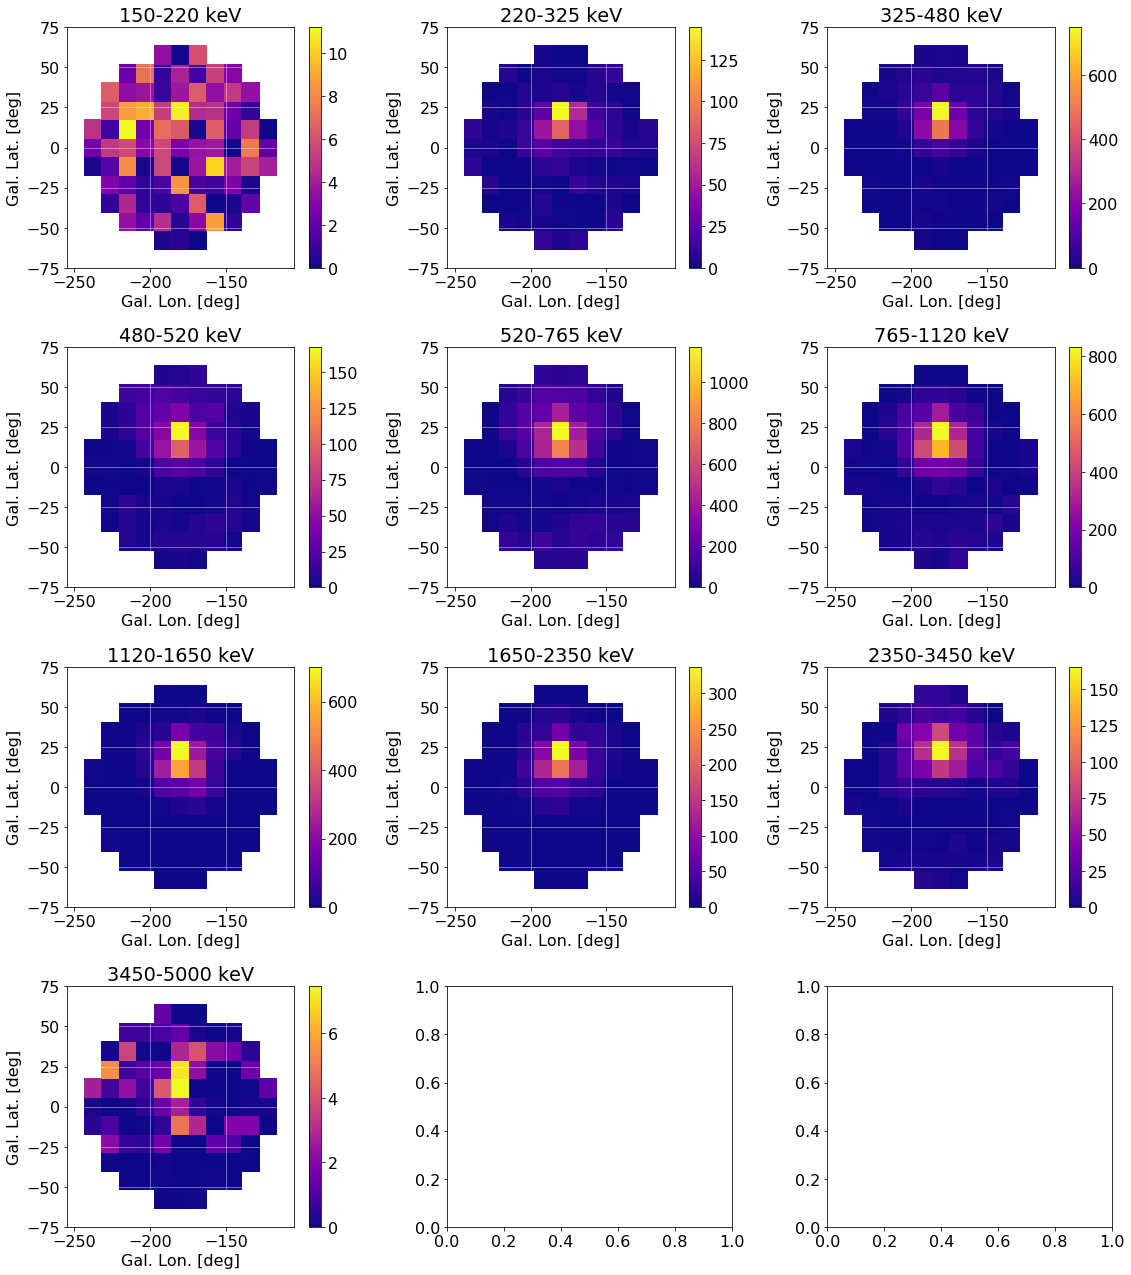

In [791]:
pc = result2.plot_TS_map_results()

In [792]:
result3.TS_map([L_GRID,B_GRID],scipy=False)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Something went wrong with the fit, ignoring grid point  -249.23076923076923 -69.23076923076923
Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Something went wrong with the fit, ignoring grid point  -237.6923076923077 -69.23076923076923
Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Something went wrong with the fit, ignoring grid point  -226.15384615384616 -69.23076923076923
Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Something went wrong with the fit, ignoring grid point  -214.6153846153846 -69.23076923076923
Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Something went wrong with the fit, ignoring grid point  -203.07692307692307 -69.23076923076923
Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Something went wrong with the fit, ignoring grid point  -191.53846153846155 -69.23076923076923
Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Something went wrong with the fit, ignoring grid point  -180.0 -69.23076923076923
Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Something went wrong with the fit, ignoring grid point  -168.46153846153845 -69.23076923076923
Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Something went wrong with the fit, ignoring grid point  -156.9230769230769 -69.23076923076923
Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Something went wrong with the fit, ignoring grid point  -145.3846153846154 -69.23076923076923
Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Something went wrong with the fit, ignoring grid point  -133.84615384615384 -69.23076923076923
Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Something went wrong with the fit, ignoring grid point  -122.30769230769232 -69.23076923076923
Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Something went wrong with the fit, ignoring grid point  -110.76923076923077 -69.23076923076923
Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -57.69230769230769
Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -57.69230769230769
Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -57.69230769230769
Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 -57.69230769230769
Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 -57.69230769230769
Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 -57.69230769230769
Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 -57.69230769230769
Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -57.69230769230769
Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -57.69230769230769
Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -57.69230769230769
Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -46.153846153846146
Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -46.153846153846146
Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -46.153846153846146
Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -46.153846153846146
Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -46.153846153846146
Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -46.153846153846146
Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -34.61538461538461
Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -34.61538461538461
Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -34.61538461538461
Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -34.61538461538461
Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -23.076923076923077
Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -23.076923076923077
Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -23.076923076923077
Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -23.076923076923077
Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -11.538461538461537
Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -11.538461538461537
Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -3.552713678800501e-15
Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -3.552713678800501e-15
Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 11.538461538461544
Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 11.538461538461544
Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 23.076923076923077
Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 23.076923076923077
Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 23.076923076923077
Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 23.076923076923077
Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 34.61538461538461
Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 34.61538461538461
Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Something went wrong with the fit, ignoring grid point  226.15384615384616 34.61538461538461
Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 34.61538461538461
Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 34.61538461538461
Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 46.15384615384616
Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 46.15384615384616
Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 46.15384615384616
Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 46.15384615384616
Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 46.15384615384616
Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 46.15384615384616
Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 57.69230769230769
Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 57.69230769230769
Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 57.69230769230769
Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 57.69230769230769
Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 57.69230769230769
Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 57.69230769230769
Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 57.69230769230769
Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 57.69230769230769
Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 57.69230769230769
Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 57.69230769230769
Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 69.23076923076923
Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 69.23076923076923
Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 69.23076923076923
Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Something went wrong with the fit, ignoring grid point  145.3846153846154 69.23076923076923
Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Something went wrong with the fit, ignoring grid point  156.92307692307693 69.23076923076923
Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Something went wrong with the fit, ignoring grid point  168.46153846153845 69.23076923076923
Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Something went wrong with the fit, ignoring grid point  180.0 69.23076923076923
Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Something went wrong with the fit, ignoring grid point  191.53846153846155 69.23076923076923
Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Something went wrong with the fit, ignoring grid point  203.0769230769231 69.23076923076923
Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Something went wrong with the fit, ignoring grid point  214.6153846153846 69.23076923076923
Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 69.23076923076923
Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 69.23076923076923
Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 69.23076923076923
Initial log joint probability = -287.384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2      -287.345    0.00519962     0.0169289           1           1        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = 27.0949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       27.2187    0.00995039   0.000155464    0.000399       0.001        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = 119.89
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       120.087    0.00995081    0.00188763   0.0002517       0.001        3   
Optimization terminated normally: 
  C

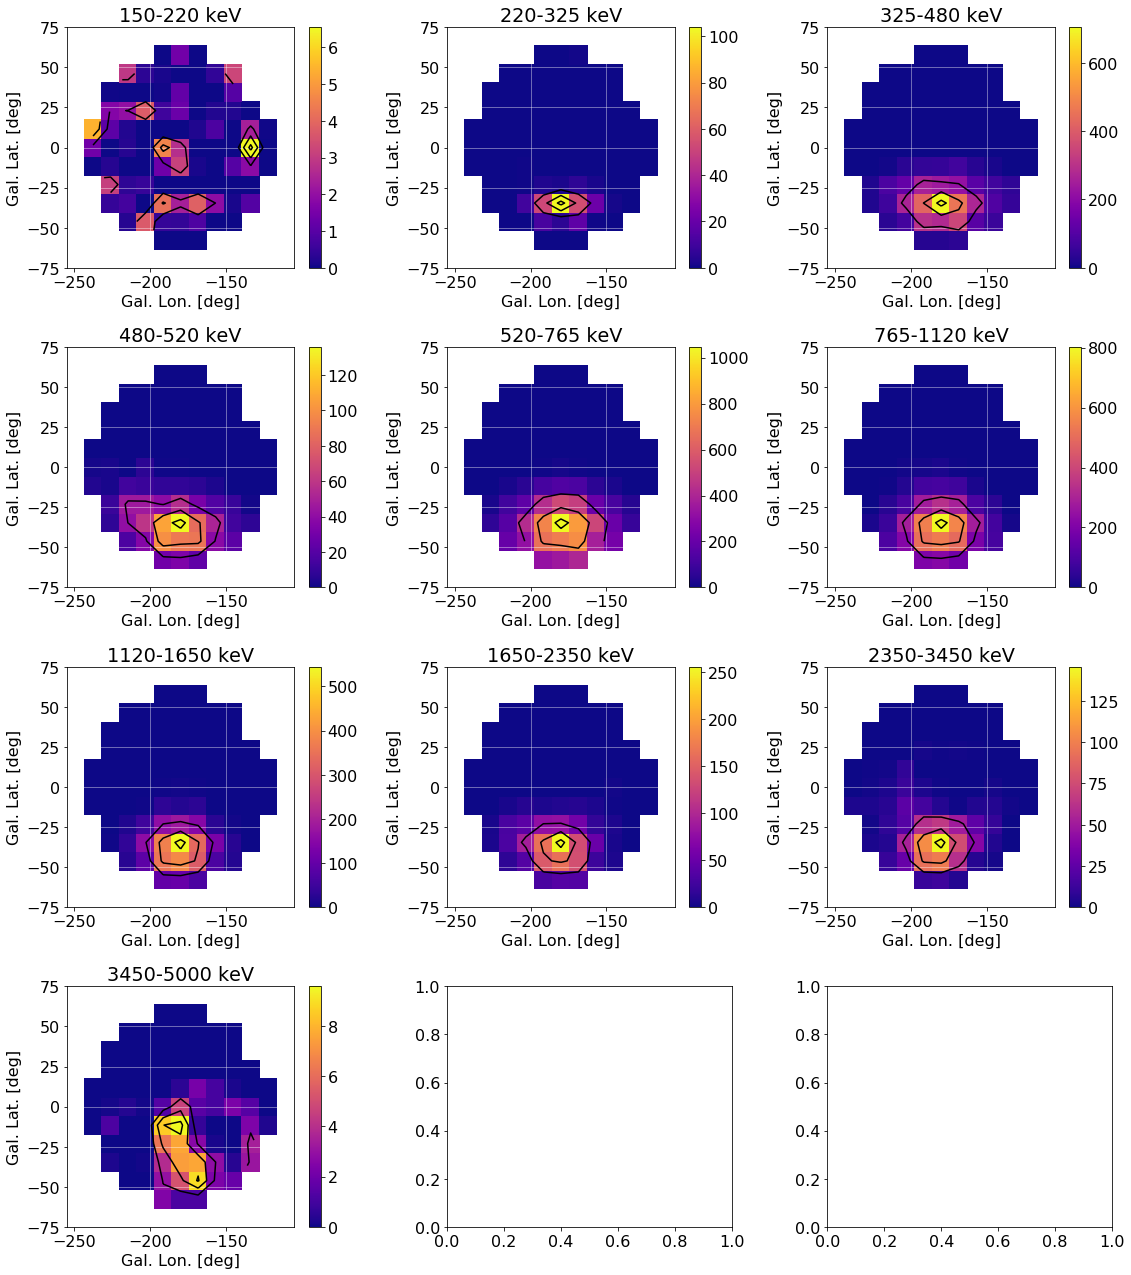

In [793]:
pc = result3.plot_TS_map_results()

In [794]:
result4.TS_map([L_GRID,B_GRID],scipy=False)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Something went wrong with the fit, ignoring grid point  -249.23076923076923 -69.23076923076923
Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Something went wrong with the fit, ignoring grid point  -237.6923076923077 -69.23076923076923
Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Something went wrong with the fit, ignoring grid point  -226.15384615384616 -69.23076923076923
Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Something went wrong with the fit, ignoring grid point  -214.6153846153846 -69.23076923076923
Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Something went wrong with the fit, ignoring grid point  -203.07692307692307 -69.23076923076923
Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Something went wrong with the fit, ignoring grid point  -191.53846153846155 -69.23076923076923
Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Something went wrong with the fit, ignoring grid point  -180.0 -69.23076923076923
Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Something went wrong with the fit, ignoring grid point  -168.46153846153845 -69.23076923076923
Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Something went wrong with the fit, ignoring grid point  -156.9230769230769 -69.23076923076923
Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Something went wrong with the fit, ignoring grid point  -145.3846153846154 -69.23076923076923
Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Something went wrong with the fit, ignoring grid point  -133.84615384615384 -69.23076923076923
Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Something went wrong with the fit, ignoring grid point  -122.30769230769232 -69.23076923076923
Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Something went wrong with the fit, ignoring grid point  -110.76923076923077 -69.23076923076923
Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -57.69230769230769
Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -57.69230769230769
Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -57.69230769230769
Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 -57.69230769230769
Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 -57.69230769230769
Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 -57.69230769230769
Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 -57.69230769230769
Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -57.69230769230769
Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -57.69230769230769
Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -57.69230769230769
Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -46.153846153846146
Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -46.153846153846146
Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 -46.153846153846146
Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Something went wrong with the fit, ignoring grid point  145.3846153846154 -46.153846153846146
Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 -46.153846153846146
Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -46.153846153846146
Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -46.153846153846146
Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -34.61538461538461
Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -34.61538461538461
Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -34.61538461538461
Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -34.61538461538461
Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -23.076923076923077
Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 -23.076923076923077
Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 -23.076923076923077
Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -23.076923076923077
Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -11.538461538461537
Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -11.538461538461537
Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Something went wrong with the fit, ignoring grid point  110.76923076923077 -3.552713678800501e-15
Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Something went wrong with the fit, ignoring grid point  249.23076923076923 -3.552713678800501e-15
Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Something went wrong with the fit, ignoring grid point  110.76923076923077 11.538461538461544
Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Something went wrong with the fit, ignoring grid point  249.23076923076923 11.538461538461544
Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Something went wrong with the fit, ignoring grid point  110.76923076923077 23.076923076923077
Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Something went wrong with the fit, ignoring grid point  122.30769230769229 23.076923076923077
Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Something went wrong with the fit, ignoring grid point  237.69230769230768 23.076923076923077
Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Something went wrong with the fit, ignoring grid point  249.23076923076923 23.076923076923077
Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Something went wrong with the fit, ignoring grid point  110.76923076923077 34.61538461538461
Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Something went wrong with the fit, ignoring grid point  122.30769230769229 34.61538461538461
Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Something went wrong with the fit, ignoring grid point  237.69230769230768 34.61538461538461
Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Something went wrong with the fit, ignoring grid point  249.23076923076923 34.61538461538461
Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 46.15384615384616
Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 46.15384615384616
Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 46.15384615384616
Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 46.15384615384616
Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 46.15384615384616
Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 46.15384615384616
Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Something went wrong with the fit, ignoring grid point  110.76923076923077 57.69230769230769
Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Something went wrong with the fit, ignoring grid point  122.30769230769229 57.69230769230769
Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Something went wrong with the fit, ignoring grid point  133.84615384615384 57.69230769230769
Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Something went wrong with the fit, ignoring grid point  145.3846153846154 57.69230769230769
Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Something went wrong with the fit, ignoring grid point  156.92307692307693 57.69230769230769
Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Something went wrong with the fit, ignoring grid point  203.0769230769231 57.69230769230769
Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Something went wrong with the fit, ignoring grid point  214.6153846153846 57.69230769230769
Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Something went wrong with the fit, ignoring grid point  226.15384615384616 57.69230769230769
Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Something went wrong with the fit, ignoring grid point  237.69230769230768 57.69230769230769
Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Something went wrong with the fit, ignoring grid point  249.23076923076923 57.69230769230769
Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Something went wrong with the fit, ignoring grid point  110.76923076923077 69.23076923076923
Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Something went wrong with the fit, ignoring grid point  122.30769230769229 69.23076923076923
Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Something went wrong with the fit, ignoring grid point  133.84615384615384 69.23076923076923
Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Something went wrong with the fit, ignoring grid point  145.3846153846154 69.23076923076923
Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Something went wrong with the fit, ignoring grid point  156.92307692307693 69.23076923076923
Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Something went wrong with the fit, ignoring grid point  168.46153846153845 69.23076923076923
Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Something went wrong with the fit, ignoring grid point  180.0 69.23076923076923
Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Something went wrong with the fit, ignoring grid point  191.53846153846155 69.23076923076923
Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Something went wrong with the fit, ignoring grid point  203.0769230769231 69.23076923076923
Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Something went wrong with the fit, ignoring grid point  214.6153846153846 69.23076923076923
Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Something went wrong with the fit, ignoring grid point  226.15384615384616 69.23076923076923
Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Something went wrong with the fit, ignoring grid point  237.69230769230768 69.23076923076923
Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


Something went wrong with the fit, ignoring grid point  249.23076923076923 69.23076923076923
Initial log joint probability = -308.355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2      -308.346    0.00802035    0.00755663           1           1        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -883.236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2      -883.189   0.000587399     0.0027442           1           1        3   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -1401.74
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2      -1401.66    0.00515392     0.0389579           1           1        3   
Optimization terminated normally: 


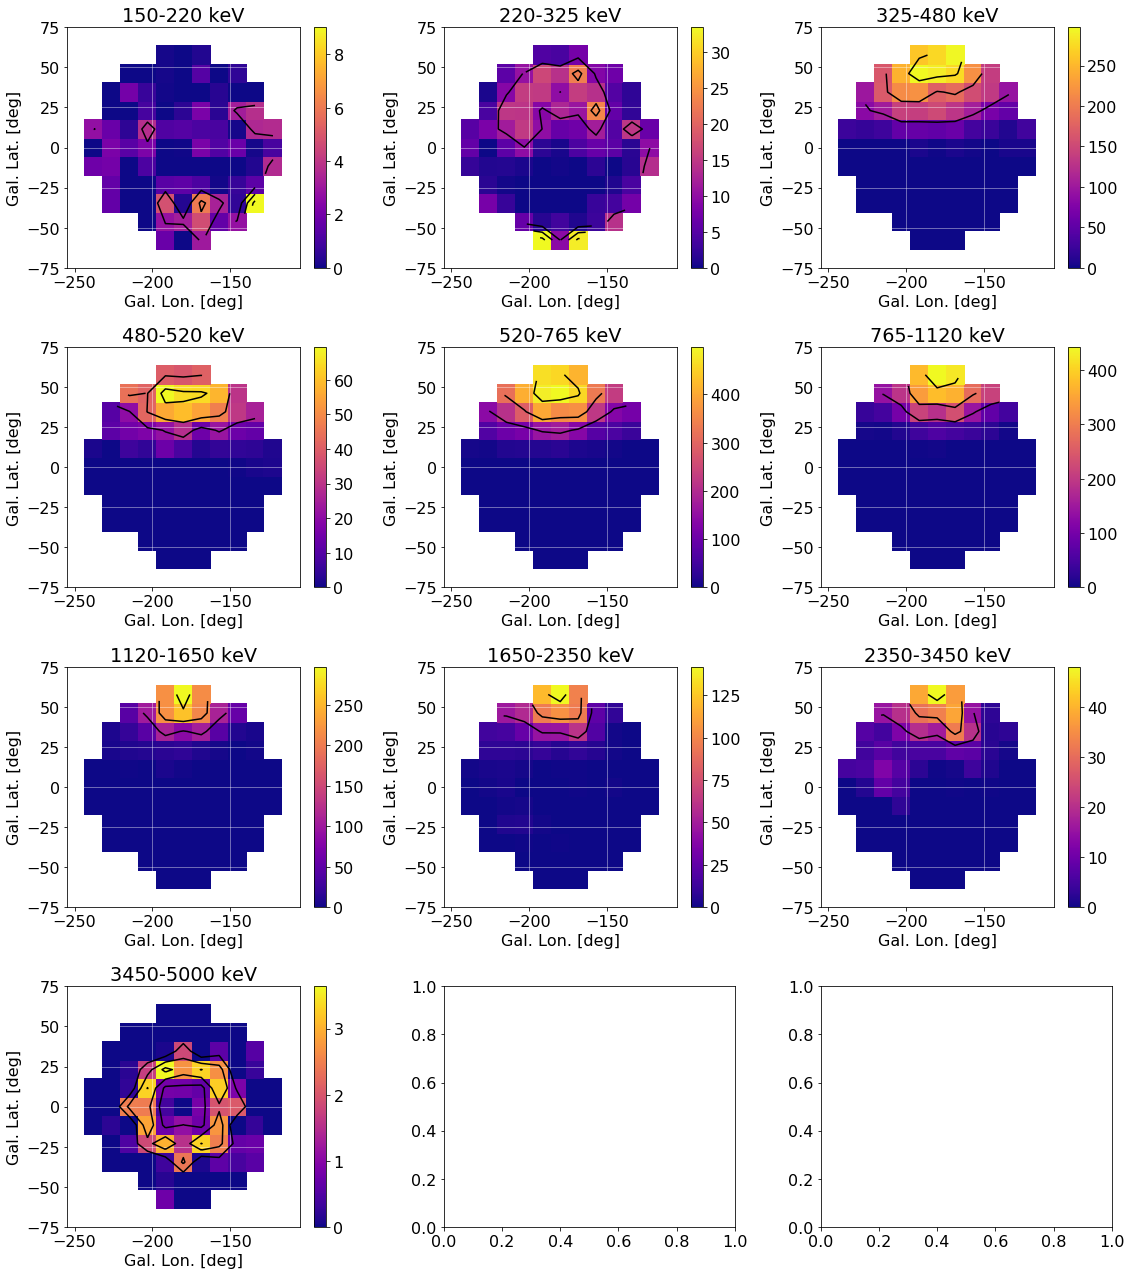

In [795]:
pc = result4.plot_TS_map_results()